<div class="alert alert-info">
    <h1>
        <center>
            <font color=#FF2E63> HEART DISEASE PREDICTION USING LOGISTIC REGRESSION.</font>
        </center>
    </h1>
</div>

## <span style='color:#FF2E63'>|</span><font> Introduction<font>

World Health Organization has  estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications.

## <span style='color:#FF2E63'>|</span><font> Objective <font>
    
This notebook intends to explore the dataset as well as predict the overall risk of heart disease using logistic regression.

## <span style='color:#FF2E63'>|</span><font> Contents <font>

<hr style="border:1px solid #FF2E63;" />

## <b>1 <span style='color: #FF2E63'>|</span><font> Importing libraries<font>

In [1]:
# For getting data ready
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# For Data Preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# For Testing
from sklearn.metrics import accuracy_score

# For generating random seed
import numpy as np
import random as rnd

np.random.seed(42)

<hr style="border:1px solid #FF2E63;" />

## <b>2 <span style='color:#FF2E63'>|</span><font> Data Exploration <font>

### <font color=red>Source:<font>

The dataset is publically available on the Kaggle website.  The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
    
#### SOURCE : https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci
    
<br>
    

---

In [2]:
df = pd.read_csv('heart_disease_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


---

### 2.1 <span style='color:#FF2E63'>|</span><font> Feature Columns Annotation <font>

<br>
    
 - **<font color=SteelBlue>Demographic:<font>**
    
    - __age :__ age in years

    - __sex :__ sex (1 = male; 0 = female)

    
 - **<font color=SteelBlue>Medical:<font>**
    - __cp :__ chest pain type
        - 0 : typical angina
        - 1 : atypical angina
        - 2 : non-anginal pain
        - 3 : asymptomatic

    - __trestbps :__ resting blood pressure (in mm Hg on admission to the hospital)

    - __chol :__ serum cholestoral in mg/dl

    - __fbs :__ (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

    - __restecg :__ resting electrocardiographic results
        - 0 : normal
        - 1 : having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        - 2 : showing probable or definite left ventricular hypertrophy by Estes' criteria

    - __thalach :__ maximum heart rate achieved

    - __exang :__ exercise induced angina (1 = yes; 0 = no)

    - __oldpeak :__ ST depression induced by exercise relative to rest

    - __slope :__ the slope of the peak exercise ST segment
        - 0 : upsloping
        - 1 : flat
        - 2 : downsloping

    - __ca :__ number of major vessels (0-3) colored by flourosopy

    - __thal :__ 
        - 0 = normal
        - 1 = fixed defect
        - 2 = reversable defect and the label


 - **<font color=SteelBlue>Target variable :<font>**

    - __target :__ medical condition
        - 0 : no disease
        - 1 : disease

---

### 2.2 <span style='color:#FF2E63'>|</span><font> Data Insights <font>

<br>

In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


<hr style="border:1px solid #FF2E63;" />

## <b>3 <span style='color:#FF2E63'>|</span><font> Data Visualization <font>

In [9]:
def draw_semi_pie_chart(data, column, fig, renamed_index_dict, title):
    default_colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666']
    rnd.shuffle(default_colors)
    ax = df[column].value_counts().rename(index = renamed_index_dict).plot.pie(colors = default_colors, autopct='%1.1f%%', startangle=90, title = title)
    ax.set_ylabel('')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)
        
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)


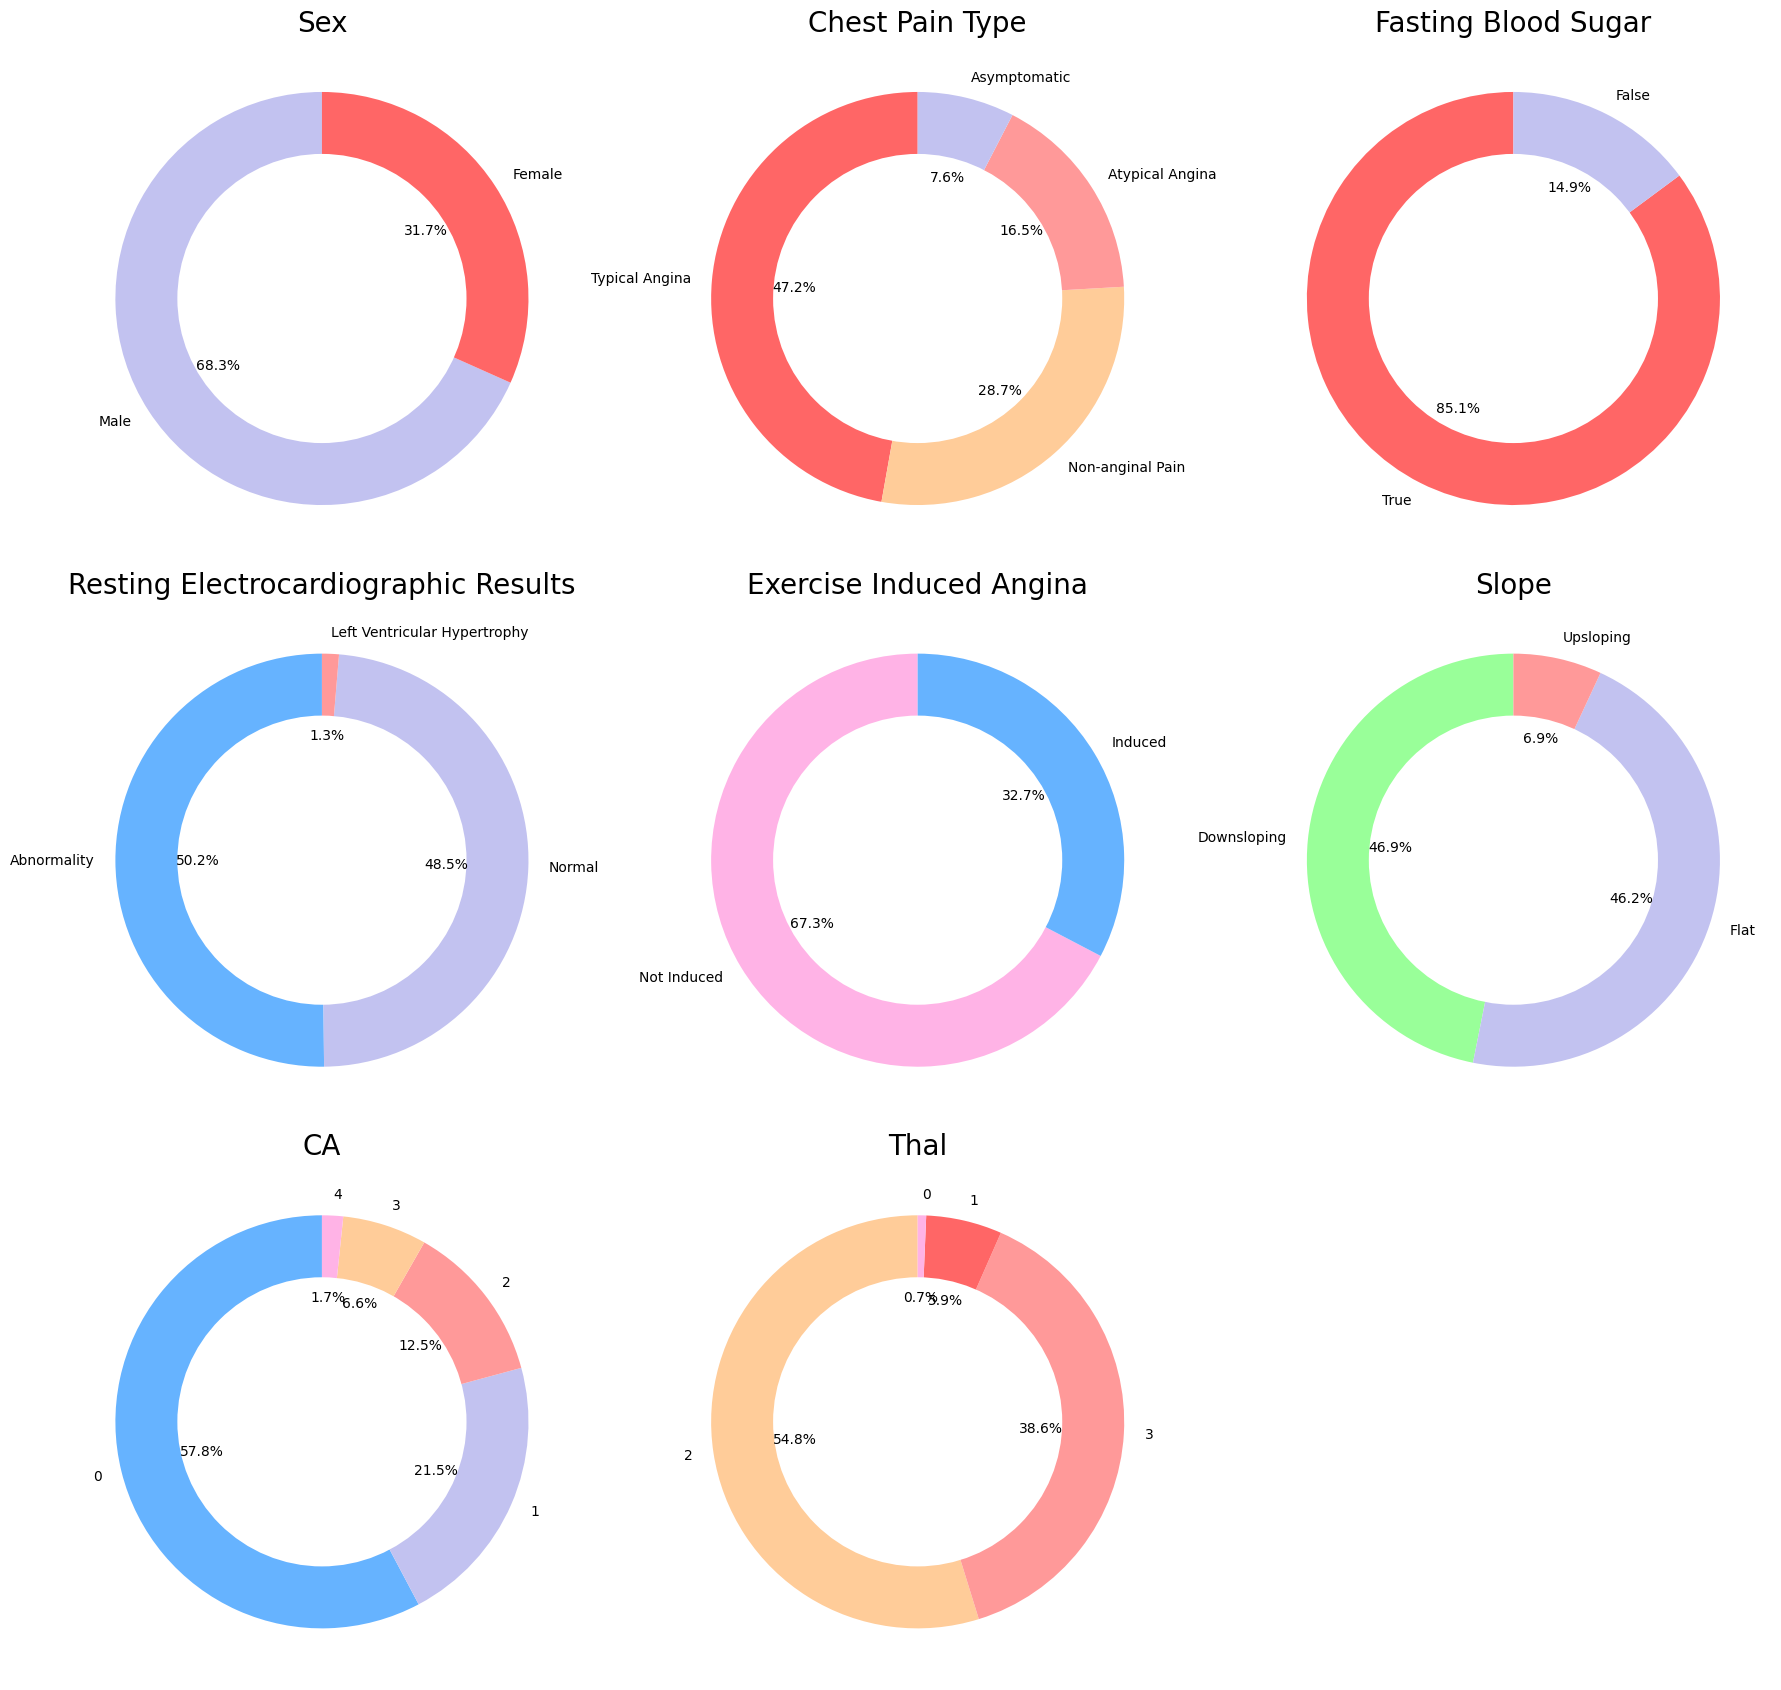

In [10]:
fig = plt.gcf()
fig.set_size_inches(18, 17)
grid_rows = 3
grid_cols = 3

# Draw Sex Pie chart
plt.subplot(grid_rows, grid_cols, 1)
draw_semi_pie_chart(df, 'sex', fig, {0: 'Female', 1: 'Male'}, 'Sex')

# Draw Chest pain type chart
plt.subplot(grid_rows, grid_cols, 2)
draw_semi_pie_chart(df, 'cp', fig, {0:'Typical Angina', 1:'Atypical Angina', 2:'Non-anginal Pain',3:'Asymptomatic'}, 'Chest Pain Type')

# Draw Fasting blood sugar chart
plt.subplot(grid_rows, grid_cols, 3)
draw_semi_pie_chart(df, 'fbs', fig, {0:'True', 1:'False'}, 'Fasting Blood Sugar')

# Draw restecg - resting electrocardiographic results
plt.subplot(grid_rows, grid_cols, 4)
draw_semi_pie_chart(df, 'restecg', fig, {0:'Normal', 1:'Abnormality', 2:'Left Ventricular Hypertrophy'}, 'Resting Electrocardiographic Results')

# Draw exang - exercise induced angina
plt.subplot(grid_rows, grid_cols, 5)
draw_semi_pie_chart(df, 'exang', fig, {0:'Not Induced', 1:'Induced'}, 'Exercise Induced Angina')

# Draw exang - exercise induced angina
plt.subplot(grid_rows, grid_cols, 6)
draw_semi_pie_chart(df, 'slope', fig, {0:'Upsloping', 1:'Flat', 2:'Downsloping'}, 'Slope')

# Draw ca
plt.subplot(grid_rows, grid_cols, 7)
draw_semi_pie_chart(df, 'ca', fig, {0:'0', 1:'1', 2:'2', 3:'3', 4:'4'}, 'CA')

# Draw thal
plt.subplot(grid_rows, grid_cols, 8)
draw_semi_pie_chart(df, 'thal', fig, {0:'0', 1:'1', 2:'2', 3:'3'}, 'Thal')

# This should be bar chart - trestbps - chol - thalach - oldpeak

fig.tight_layout()
plt.show()

* Dataset contains more male patients than female.
* Typical Angina and Non-Anginal is the common Chest pain type.
* Most of the patients has Fasting Blood Sugar > 120 mg/dl.
* Left Ventricular Hypertrophy is observed least in Resting Electrocardiographics Results.
* Excersize didn't induce Angina for more than 60%+ patients.
* Downsloping is least observed in the Slope.
* Least type of CA is 3 and most type is 0
* Least type of Thal is 1 and most type is 0

---

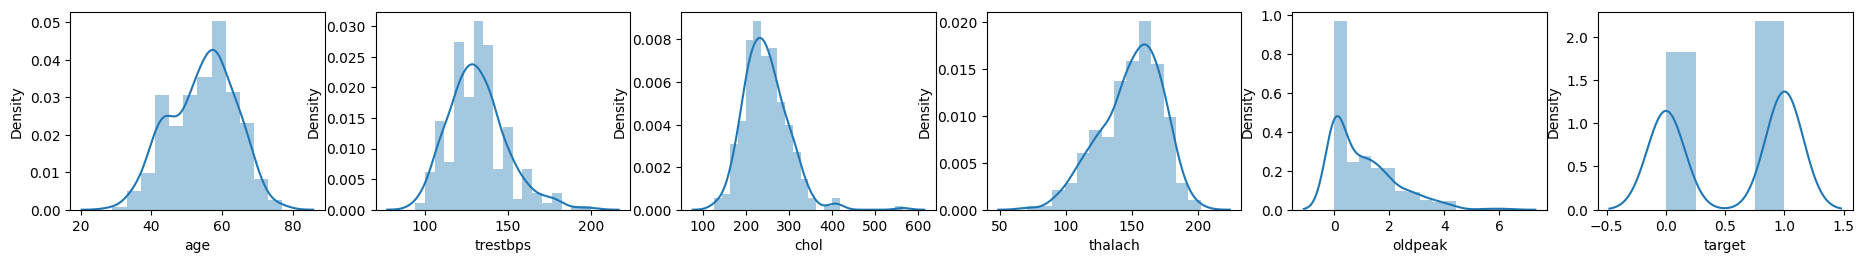

In [11]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
number_of_columns = len(continuous_features)
number_of_rows = 5
plt.figure(figsize=(23, 18))

for i, f in enumerate(continuous_features):
    plt.subplot(number_of_rows + 1, number_of_columns, i + 1)
    sns.distplot(df[f], kde=True)

* The features Age, trestbps, chol are normally distributed.
* The likelihood of getting heart disease of more for the people with age 50 - 60.
* The target variable is balanced.

<hr style="border:1px solid #FF2E63;" />

## <b>4 <span style='color:#FF2E63'>|</span><font> Data Preparation for Machine Learning <font>

### 4.1 <span style='color:#FF2E63'>|</span><font> Splitting Data - X(***labels***) And Y (***target***)<font>

<br>

In [12]:
# Splitting Target and Feature Columns 
X = df.drop(columns='target', axis=1)
y = df['target']

### 4.2 <span style='color:#FF2E63'>|</span><font> Splitting Data - Training Data & Testing Data <font>

<br>

In [13]:
# Splitting Data into Training and Test Data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

<hr style="border:1px solid #FF2E63;" />

## <b>5 <span style='color:#FF2E63'>|</span><font> Models <font>

### 5.1 <span style='color:#FF2E63'>|</span><font> Logistic Regression <font>

<br>

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

log_acc=accuracy_score(y_test,log_reg.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(y_train,log_reg.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,log_reg.predict(X_test))*100))

Train Set Accuracy:85.12396694214877
Test Set Accuracy:81.9672131147541


### 5.2 <span style='color:#FF2E63'>|</span><font> KNeighborsClassifier <font>

<br>

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()                #knn classifier
knn.fit(X_train,y_train)

knn_acc = accuracy_score(y_test,knn.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(y_train,knn.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,knn.predict(X_test))*100))

Train Set Accuracy:78.099173553719
Test Set Accuracy:62.295081967213115


### 5.3 <span style='color:#FF2E63'>|</span><font> Support Vector Classifier <font>

<br>

In [16]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)    

svm_acc= accuracy_score(y_test,svm.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(y_train,svm.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,svm.predict(X_test))*100))

Train Set Accuracy:69.42148760330579
Test Set Accuracy:62.295081967213115


### 5.4 <span style='color:#FF2E63'>|</span><font> Decision Tree Classifier <font>

<br>

In [17]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)


dtc_acc= accuracy_score(y_test,dtc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(y_train,dtc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,dtc.predict(X_test))*100))

Train Set Accuracy:100.0
Test Set Accuracy:81.9672131147541


### 5.5 <span style='color:#FF2E63'>|</span><font> Random Forest Classifier <font>

<br>

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


rfc_acc= accuracy_score(y_test,rfc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(y_train,dtc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,dtc.predict(X_test))*100))

Train Set Accuracy:100.0
Test Set Accuracy:81.9672131147541


### 5.6 <span style='color:#FF2E63'>|</span><font> Gradient Boosting Classifier <font>

<br>

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)


gbc_acc=accuracy_score(y_test,gbc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(y_train,gbc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,gbc.predict(X_test))*100))

Train Set Accuracy:100.0
Test Set Accuracy:73.77049180327869


### 5.7 <span style='color:#FF2E63'>|</span><font> Overview <font>

<br>

In [20]:
models = pd.DataFrame({
    'Model': ['Logistic','KNN', 'SVC',  'Decision Tree Classifier', 'Random Forest Classifier',
             'Gradient Boosting Classifier'],
    'Score': [ log_acc,knn_acc, svm_acc, dtc_acc, rfc_acc, gbc_acc,]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic,0.819672
3,Decision Tree Classifier,0.819672
4,Random Forest Classifier,0.803279
5,Gradient Boosting Classifier,0.737705
1,KNN,0.622951
2,SVC,0.622951


<hr style="border:1px solid #FF2E63;" />

## <b>6 <span style='color:#FF2E63'>|</span><font> Making a Predictive System <font>

In [21]:
input_data = (59,1,0,134,204,0,0,162,0,0.8,0,2,0)

# change the input data to a numpy array
input_data_as_np_array = np.asarray(input_data)

# reshaping the np array as we are predicting for only one instance
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

prediction = log_reg.predict(input_data_reshaped)

print(prediction)

if (prediction[0] == 0):
    print('The Person does not have Heart Disease')
else:
    print('The Person has Heart Disease')

[1]
The Person has Heart Disease


<hr style="border:1px solid #FF2E63;" />

## <b>7 <span style='color:#FF2E63'>|</span><font> Saving Trained Model<font>

In [22]:
import pickle

filename = 'heart_disease_model.sav'
pickle.dump(log_reg, open(filename, 'wb'))